# Знакомство с SciPy 

**Оптимизация**

In [1]:
from scipy import optimize

In [2]:
# Запишем функцию от нескольких переменных, 
# где массив x передаёт переменные [x, y]
def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3

print(f([3.2, 0.1]))

3.0


Запускаем оптимизацию, где [5, 5] представляет вектор, откуда начинается оптимизация.

In [3]:
x_min = optimize.minimize(f, [5, 5])
print(x_min)

      fun: 3.0000000000011435
 hess_inv: array([[ 0.94055055, -0.16183475],
       [-0.16183475,  0.55944947]])
      jac: array([-2.05636024e-06,  5.36441803e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([3.19999896, 0.10000026])


Выведем координаты точки минимума

In [4]:
print(x_min.x)

[3.19999896 0.10000026]


**Работа с линейной алгеброй**

In [5]:
import numpy as np
from scipy import linalg

In [6]:
# Задаём матрицу системы линейных уравнений
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])

# Задаём значения, которые должны получиться при умножении матрицы на вектор
b = np.array([2, 4, -1])

# Нахождения вектора, который после трансформации окажется в координатах вектора b
x = linalg.solve(a, b)
print(x)

[ 2. -2.  9.]


Выполняем проверку

In [7]:
print(np.dot(a, x))

[ 2.  4. -1.]


**Сингулярное разложение матрицы**

In [8]:
# Генерация матрицы из случайных чисел
X = np.random.randn(4, 3)

# Выполняем сингулярное разложение
U, D, V = linalg.svd(X)

# Вывод размера матриц и типа данных
print(U.shape, D.shape, V.shape)
print(type(U), type(D), type(V))

(4, 4) (3,) (3, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


## Matplotlib

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt

# Данный модуль по известным значениям функции, приближает 
# значения промежуточных точек (интерполяция)
from scipy import interpolate

**Без шума**

In [10]:
x = np.arange(0, 10, 2)

# Функция
y = np.exp(-x/3.0)

print(x[:5])
print(y[:5])

[0 2 4 6 8]
[1.         0.51341712 0.26359714 0.13533528 0.06948345]


In [11]:
# Выполняем интерполяцию
f = interpolate.interp1d(x, y, kind='quadratic')
xnew = np.arange(0, 8, 0.1)
ynew = f(xnew)

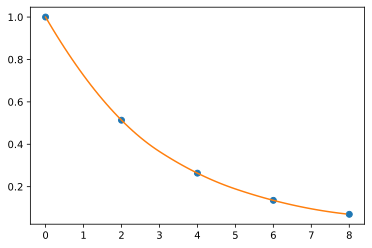

In [12]:
# Визуализируем результаты
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

**Добавим шум**

In [13]:
x = np.arange(0, 10, 2)

# Функция с добавлением шума. Умножение на 0.05 определяет размер шума
y = np.exp(-x/3.0) + np.random.randn(len(x)) * 0.05

print(x[:5])
print(y[:5])

[0 2 4 6 8]
[ 1.01101743  0.57152317  0.34776828  0.09461427 -0.01380716]


In [14]:
# Выполняем интерполяцию
f = interpolate.interp1d(x, y, kind='quadratic')
xnew = np.arange(0, 8, 0.1)
ynew = f(xnew)

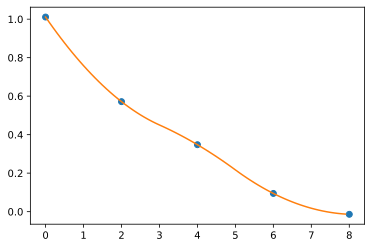

In [15]:
# Визуализируем результаты
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

Синиии точки - это известные значения функции. Ораньжевая линия представляет собой приближение.

Как видим, график имеет другой вид, отличный от exp. C добавлением шума, простой интерполяции недостаточно, а решение данного вопроса будет рассмотрено дальше.

# Решение оптимизационных задач в SciPy

In [16]:
from scipy import optimize

Функция Розенброка часто используется для тестирования оптимизационных алгоритмов, определими её. Данная функция имеет минимум в точке [1, 1]

In [17]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
    
f([1, 1])

0.0

**Метод перебора**

In [18]:
result = optimize.brute(f, ((-5, 5), (-5, 5)))
result

array([0.99999324, 1.00001283])

Мы получили достаточно хороший результат, но важно то, сколько раз производится вычисление функции, так как не все функции можно вычислить быстро. Поэтому возникает потребность в других методах поиска минимума.

**Дифференциальная эволюция** - Это генетический алгоритм.

In [19]:
optimize.differential_evolution(f, ((-5, 5), (-5, 5)))

     fun: 7.395570986446986e-32
 message: 'Optimization terminated successfully.'
    nfev: 3783
     nit: 125
 success: True
       x: array([1., 1.])

Для вычисления точки минимума потребовалось 125 итераций.

**Градиент**

Если у функции есть градиент, тогда можно применить методы градиента.

In [20]:
import numpy as np

# Определение градиента функции Розенброка
def g(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

Необходимо проверить, правильно ли мы записали градиент функции. Для этого используется функция chek_grad

In [21]:
optimize.check_grad(f, g, [2, 2])

2.384185791015625e-07

Проведя численную оценку градиента, расхождение которого оказалось небольшим. 

**Градиент bfgs**

In [22]:
optimize.fmin_bfgs(f, [2, 2], fprime=g)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9


array([1.00000582, 1.00001285])

С использованием данного метода, мы получили точки минимума за 8 иетраций. То есть, если функция гладкая, то можно использовать методы градиента.

**Функция minimize**

Данной функции необязательно указывать метод, которым производить оптимизацию и передавать градиент функции, так как функция сама выбирает метод оптимизации. 

In [23]:
optimize.minimize(f, [2, 2])

      fun: 1.7838045907468558e-11
 hess_inv: array([[0.95489061, 1.90006632],
       [1.90006632, 4.27872378]])
      jac: array([9.88093227e-07, 2.41749084e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([1.00000573, 1.00001265])

Можно явно указать метод, которым производить оптимизацию. Также можно передать градиент в функцию параметром jac=g

In [26]:
optimize.minimize(f, [2, 2], method='BFGS', jac=g)

      fun: 1.8414093407262628e-11
 hess_inv: array([[0.95489113, 1.90006768],
       [1.90006768, 4.27872719]])
      jac: array([9.88085521e-07, 2.41739812e-06])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([1.00000582, 1.00001285])

Методов большое множество, вот ещё один пример, который будет дальше в курсе.

In [25]:
optimize.minimize(f, [2, 2], method='Nelder-Mead')

 final_simplex: (array([[0.99998568, 0.99996682],
       [1.00002149, 1.00004744],
       [1.0000088 , 1.00003552]]), array([1.23119954e-10, 2.50768082e-10, 3.59639951e-10]))
           fun: 1.2311995365407462e-10
       message: 'Optimization terminated successfully.'
          nfev: 91
           nit: 46
        status: 0
       success: True
             x: array([0.99998568, 0.99996682])